Preprocessing Dataset Menggunakan Model K-Means Clustering


Import Library

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [83]:
file_path = "DATASET Jumlah Sekolah.xlsx"  
df = pd.read_excel(file_path)

Pembersihan Data

In [84]:
# Hapus baris tidak relevan
df = df[~df['Provinsi'].isin(['Indonesia', 'TOTAL'])].copy()

# Hapus duplikat
df = df.drop_duplicates()

# Pilih hanya kolom jumlah sekolah
fitur = ['SMA', 'SMK', 'MA', 'SMP', 'MTS', 'SD', 'MI', 'TK', 'RA']
df = df[['Provinsi','Tahun'] + fitur]

# Isi data hilang dengan nol
df[fitur] = df[fitur].fillna(0)



Menentukan Titik Tengah

In [85]:
# Statistik tendensi sentral
df.describe().loc[['mean', '50%']]


,Tahun,SMA,SMK,MA,SMP,MTS,SD,MI,TK,RA
mean,2023.0,381.675439,377.070175,264.350877,1124.508772,511.868421,3942.298246,703.657895,2513.105263,812.684211
50%,2023.0,241.500000,182.000000,95.500000,726.500000,180.500000,2408.000000,180.500000,1639.000000,165.000000


Memahami Sebaran Data

In [86]:
# Statistik penyebaran (std, min, max)
df.describe().loc[['std', 'min', 'max']]


,Tahun,SMA,SMK,MA,SMP,MTS,SD,MI,TK,RA
std,0.820101,382.477057,593.076555,418.940425,1258.381319,828.750915,4840.737417,1475.061906,3693.252835,1764.33707
min,2022.000000,0.000000,19.000000,0.000000,130.000000,1.000000,485.000000,3.000000,104.000000,0.00000
max,2024.000000,1820.000000,2922.000000,2187.000000,6051.000000,4006.000000,19659.000000,7657.000000,18615.000000,7554.00000


Visualisasi Distribusi Data

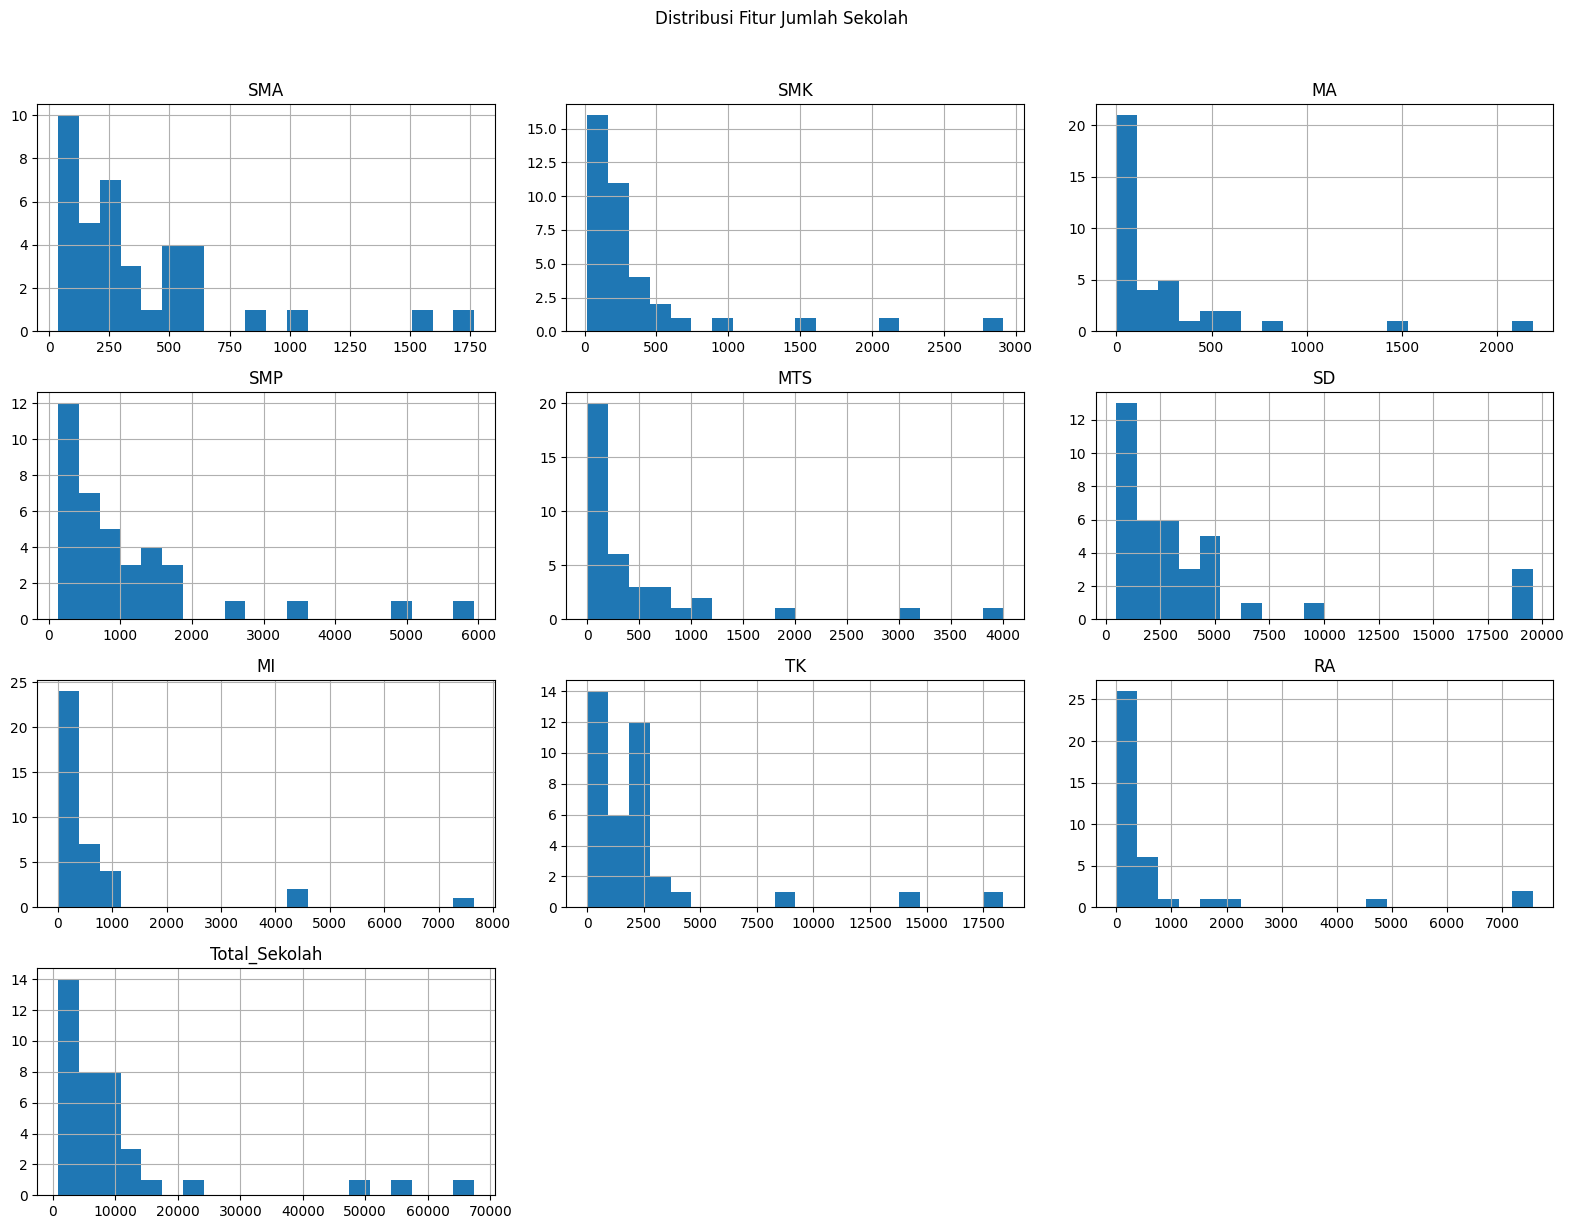

In [87]:
# Layout manual 4 baris x 3 kolom, cukup untuk 10 kolom numerik
df_numeric.hist(bins=20, figsize=(16, 12), layout=(4, 3))
plt.suptitle("Distribusi Fitur Jumlah Sekolah", y=1.02)
plt.tight_layout()
plt.show()


Analisis Pivot

In [88]:
# Pivot data total sekolah per provinsi
pivot = df.set_index("Provinsi")
pivot.sum(axis=1).sort_values(ascending=False).head()


Provinsi
Jawa Timur    69742.0
Jawa Timur    69682.0
Jawa Timur    69532.0
Jawa Barat    57714.0
Jawa Barat    57561.0
dtype: float64

Deteksi Pencilan (Outlier)

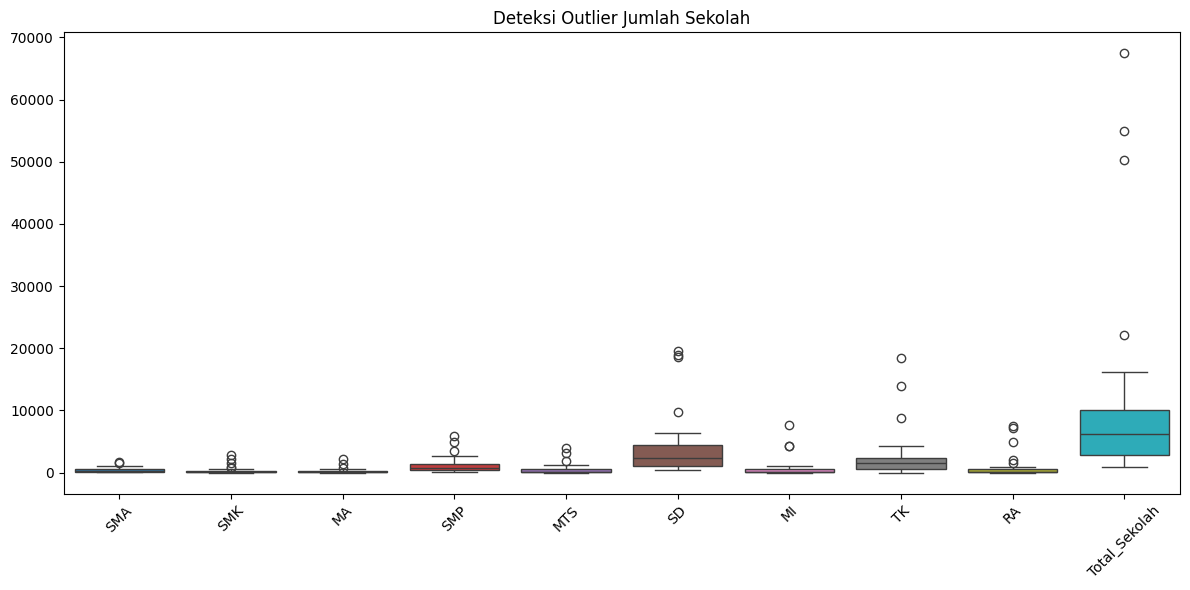

In [89]:
# Visualisasi Boxplot
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=45)
plt.title("Deteksi Outlier Jumlah Sekolah")
plt.tight_layout()
plt.show()


Memahami Hubungan Antar Atribut

In [90]:
# Korelasi antar fitur
correlation = df_numeric.corr()
correlation


,SMA,SMK,MA,SMP,MTS,SD,MI,TK,RA,Total_Sekolah
SMA,1.000000,0.938901,0.893045,0.982146,0.914623,0.926305,0.831307,0.787261,0.893952,0.913458
SMK,0.938901,1.000000,0.901805,0.972790,0.940800,0.948020,0.892466,0.838956,0.975079,0.950999
MA,0.893045,0.901805,1.000000,0.914852,0.992882,0.901525,0.958716,0.906225,0.943195,0.950850
SMP,0.982146,0.972790,0.914852,1.000000,0.941954,0.968426,0.885686,0.848250,0.944289,0.958420
MTS,0.914623,0.940800,0.992882,0.941954,1.000000,0.930476,0.962898,0.909969,0.969167,0.969443
SD,0.926305,0.948020,0.901525,0.968426,0.930476,1.000000,0.916761,0.917745,0.951488,0.983782
MI,0.831307,0.892466,0.958716,0.885686,0.962898,0.916761,1.000000,0.969766,0.963472,0.970788
TK,0.787261,0.838956,0.906225,0.848250,0.909969,0.917745,0.969766,1.000000,0.917224,0.959055
RA,0.893952,0.975079,0.943195,0.944289,0.969167,0.951488,0.963472,0.917224,1.000000,0.979766
Total_Sekolah,0.913458,0.950999,0.950850,0.958420,0.969443,0.983782,0.970788,0.959055,0.979766,1.000000


Visualisasi Hubungan Antar Atribut

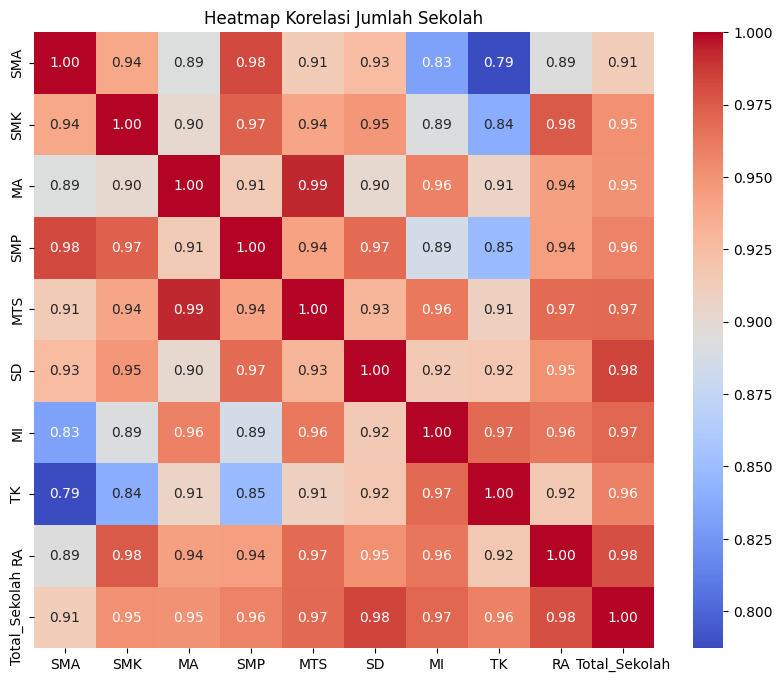

In [91]:
# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Jumlah Sekolah")
plt.show()


Visualisasi High-Dimensional

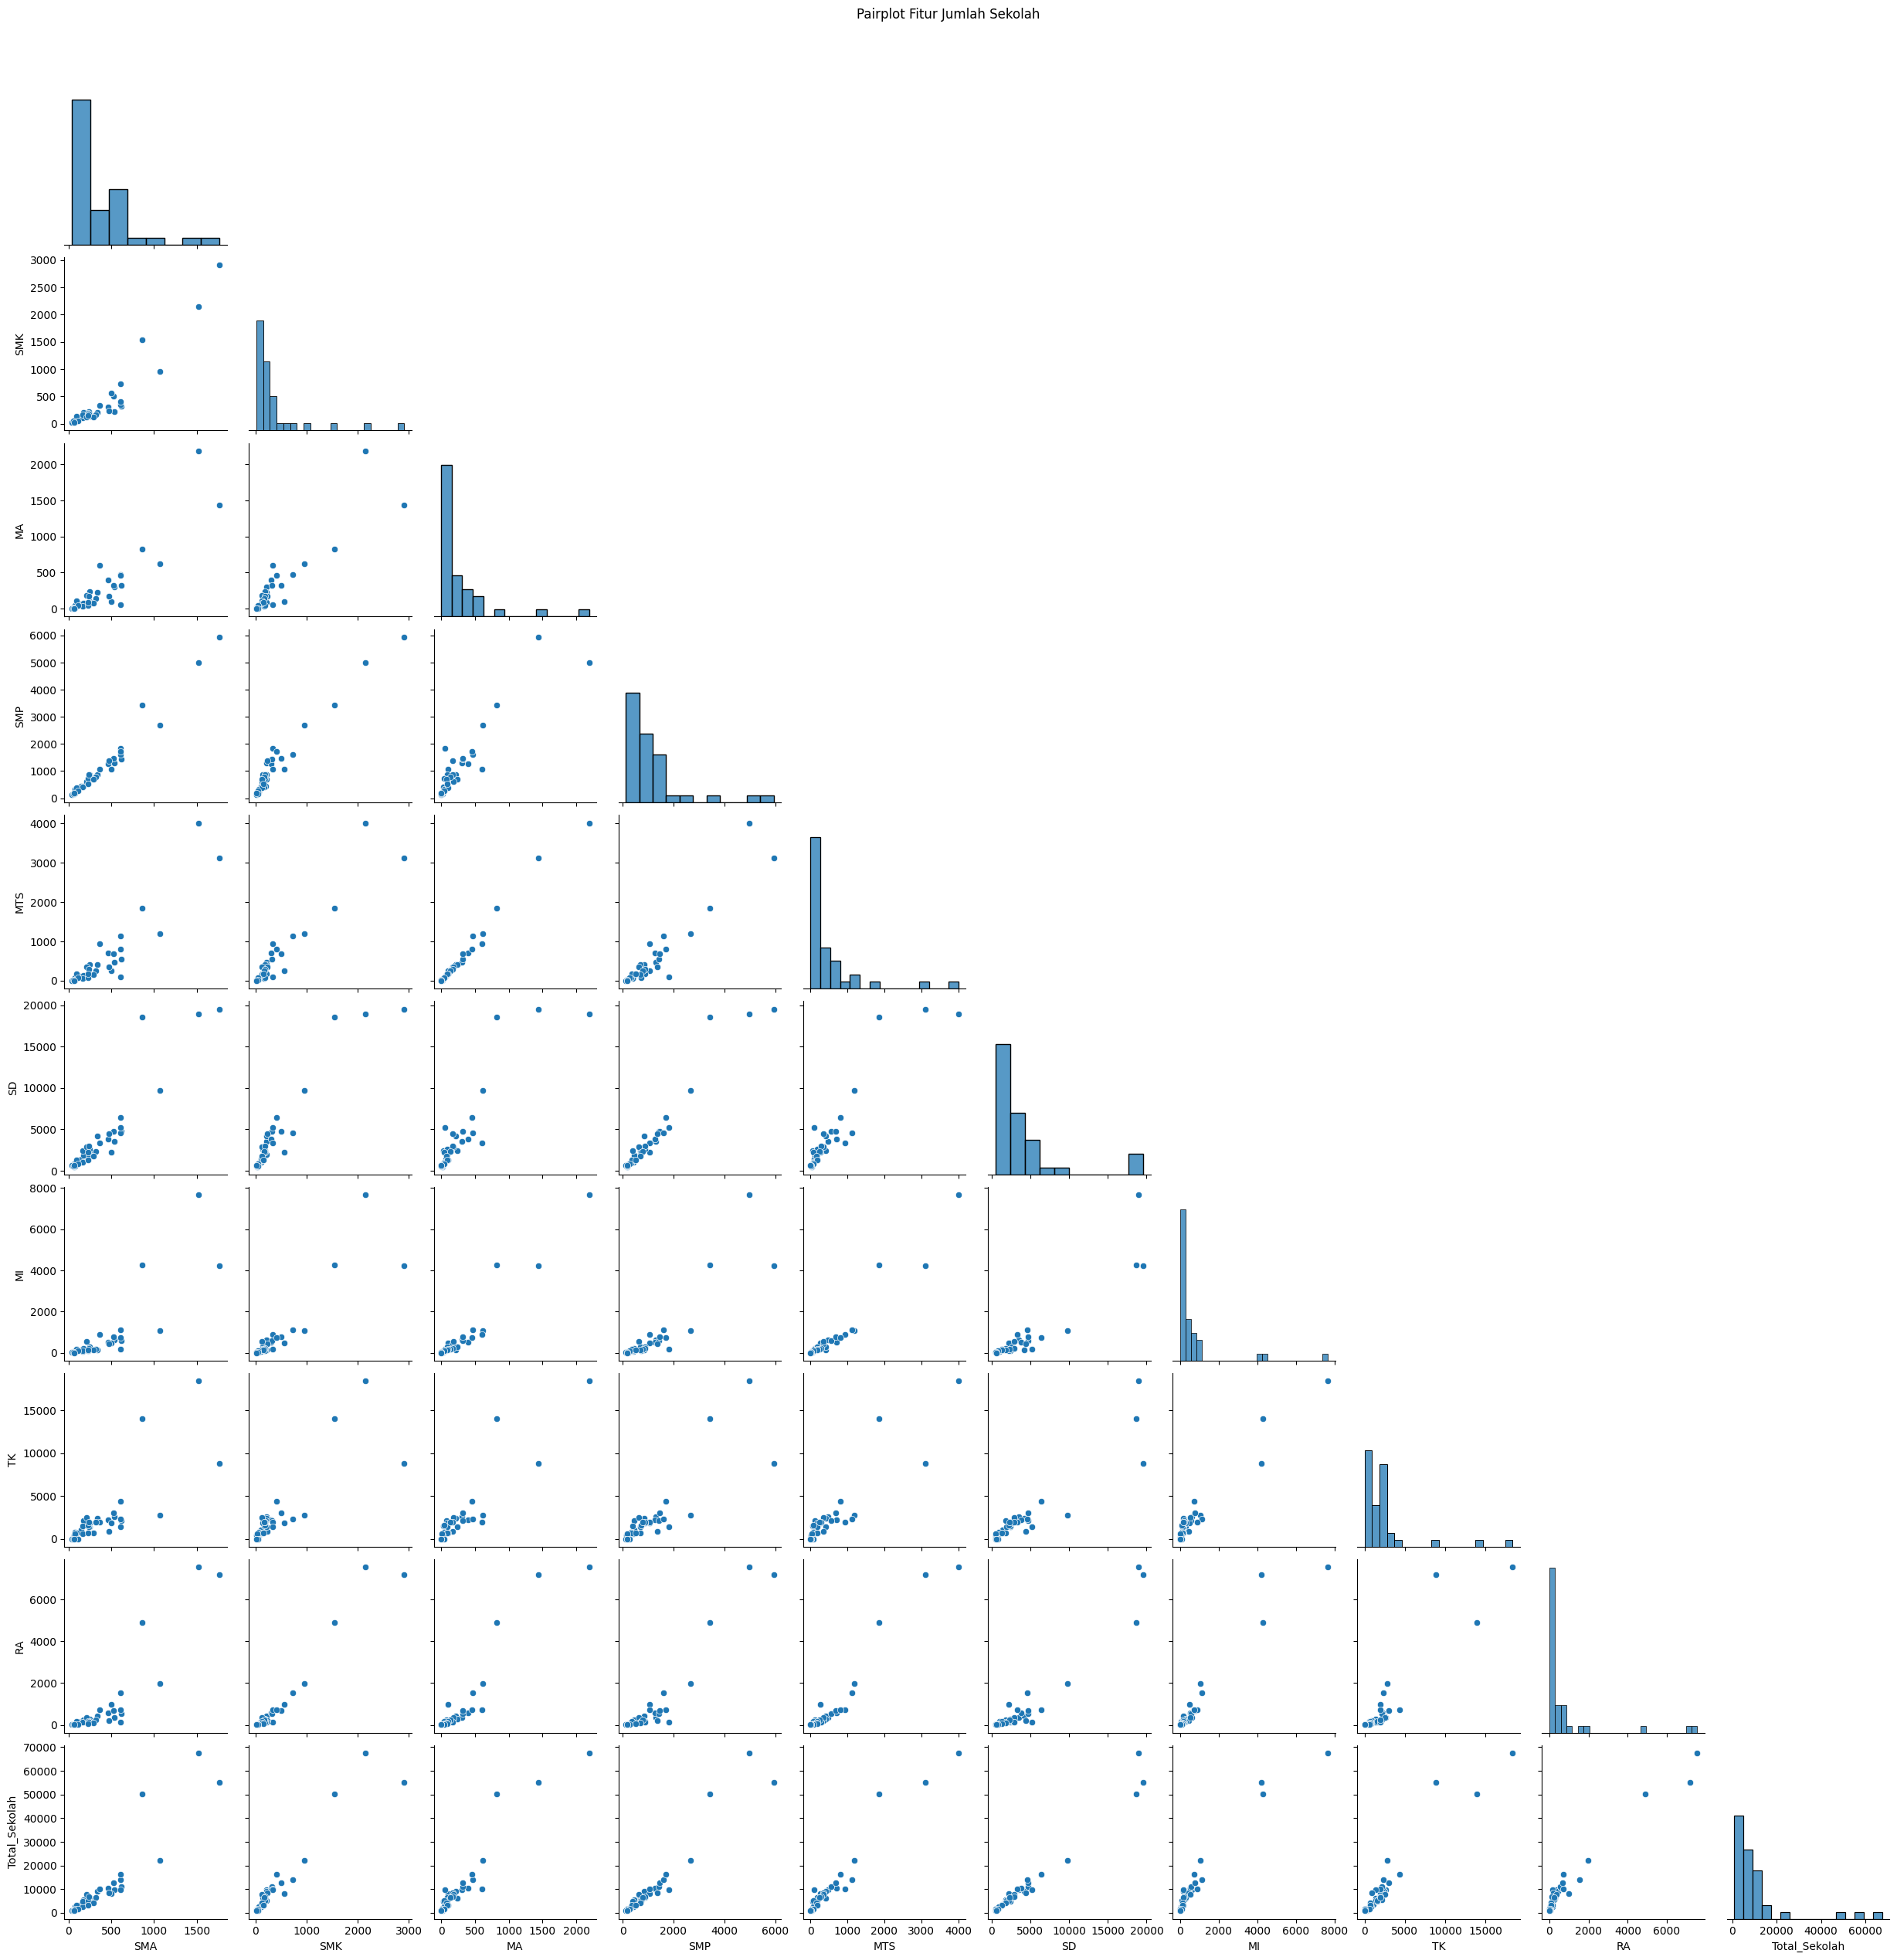

In [92]:
# Visualisasi pairplot (dimensi tinggi)
sns.pairplot(df_numeric, corner=True)
plt.suptitle("Pairplot Fitur Jumlah Sekolah", y=1.02)
plt.show()


Prediksi Pertumbuhan Sekolah

In [93]:

# Fungsi prediksi
def predict_school_growth(df, year_to_predict, education_levels):
    predictions = []
    provinces = df['Provinsi'].unique()
    # Interpolasi data hilang berdasarkan waktu
    

    for level in education_levels:
        for prov in provinces:
            prov_data = df[df['Provinsi'] == prov][['Tahun', level]].dropna()
            if len(prov_data) < 2:
                continue
           
            X = prov_data['Tahun'].values.reshape(-1, 1)
            y = prov_data[level].values

            model = LinearRegression()
            model.fit(X, y)

            pred = model.predict(np.array([[year_to_predict]]))[0]

            predictions.append({
                'Provinsi': prov,
                'Tahun': year_to_predict,
                'Jenjang': level,
                'Prediksi_Jumlah': round(pred)
            })

    return pd.DataFrame(predictions)
# Jalankan prediksi
predictions_df = predict_school_growth(df, 2025, fitur)

# Tampilkan hasil
print(predictions_df.head(10))

# (Opsional) Simpan ke Excel
predictions_df.to_excel('Prediksi_Jumlah_Sekolah_2025.xlsx', index=False)

        Provinsi  Tahun Jenjang  Prediksi_Jumlah
0           Aceh   2025     SMA              547
1           Bali   2025     SMA              160
2         Banten   2025     SMA              614
3       Bengkulu   2025     SMA              157
4  DI Yogyakarta   2025     SMA              176
5    DKI Jakarta   2025     SMA              509
6      Gorontalo   2025     SMA               72
7          Jambi   2025     SMA              259
8     Jawa Barat   2025     SMA             1875
9    Jawa Tengah   2025     SMA              875
